# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 2ο Εργαστήριο - *Principal Component Analysis (PCA)*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

# Εκφώνηση

<p>Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>ανάλυσης σε κύριες συνιστώσες</i></b> (<b><i>Principal Component Analysis</i></b>, <b><i>PCA</i></b>), υλοποιημένο σύμφωνα με τη <b><i>μέθοδο συνδιακύμανσης</i></b> (<b><i>covariance method</i></b>). Για να κατανοήσετε τη χρησιμότητα της μεθόδου θα εκπαιδεύσετε και θα αξιολογήσετε την ακρίβεια ενός μοντέλου <b><i>logistic regression</i></b> για ένα dataset πριν και μετά την εφαρμογή του αλγορίθμου <b><i>PCA</i></b>. Περισσότερες πληροφορίες για τη μέθοδο αυτή μπορείτε να αναζητήσετε <a href="https://ourarchive.otago.ac.nz/handle/10523/7534">εδώ</a>.</p>

<p>Η άσκηση περιλαμβάνει <b><i>δύο</i></b> προγράμματα <i>Python</i>: (a) το πρώτο δέχεται ένα dataset σε μορφή .<i>csv</i>, εφαρμόζει τον αλγόριθμο <b><i>PCA</i></b> και δημιουργεί το αρχείο <b><i>foo.csv</i></b> με το μετασχηματισμένο dataset, όπως προκύπτει από τις κύριες συνιστώσες που επέλεξε ο χρήστης να διατηρήσει, (b) το δεύτερο δέχεται ένα αρχείο σε μορφή .<i>csv</i>, διαχωρίζει το dataset σε <i>training</i> και <i>test set</i>, εκπαιδεύει ένα μοντέλο <b><i>logistic regression</i></b>, χρησιμοποιώντας το <i>training set</i> και υπολογίζει τον αριθμό των σφαλμάτων του μοντέλου πάνω στο <i>test set</i>.</p>

<p>Το dataset που θα χρησιμοποιήσετε παρέχεται σε δύο μορφές: (a) <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b> και (b) <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b>, το οποίο δεν περιλαμβάνει την πρώτη στήλη του <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b>, δηλαδή τα <i>labels</i> που αντιστοιχούν σε κάθε είσοδο. Τα datasets αυτά αποτελούν απλοποιημένη μορφή του dataset που μπορεί να βρεθεί <a href="https://archive.ics.uci.edu/ml/datasets/wine">εδώ</a>.</p>

<h3><b><i>Ανάλυση σε Κύριες Συνιστώσες</i></b></h3>
<p>Αρχικά, θα φορτώσετε τις βιβλιοθήκες που απαιτούνται για το πρόγραμμα που θα αναλύσει το dataset <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b> στις κύριες συνιστώσες του.</p>




In [1]:
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

<p>Στη συνέχεια, θα φορτώσετε το dataset <b><i></i></b></p>

In [2]:
data = genfromtxt('https://raw.githubusercontent.com/ChrisNick92/StochasticsLabPublic/master/Lab2/demo3b.csv', delimiter=',')

<p>Έπειτα, θα υπολογίσετε το μέσο όρο κάθε στήλης (feature) του dataset και θα κανονικοποιήσετε κάθε feature με αυτόν</p>

In [3]:
M = mean(data.T, axis=1)
data_normal = data - M

<p>Στη συνέχεια, θα υπολογίσετε το <b><i>πίνακα συνδιακύμανσης</i></b> (<b><i>covariance matrix</i></b>) για το dataset</p>

In [4]:
covariance = cov(data_normal.T)
print("The covariance matrix of the normalized data is the following: ")
print(covariance)

The covariance matrix of the normalized data is the following: 
[[ 7.89911157e-01  1.64350328e-02  5.03965534e-02 -1.39557561e+00
   4.51870543e+00  2.35123047e-01  3.56524806e-01 -2.92133512e-02
   9.15320632e-02  1.07205560e+00  3.92238044e-03  1.22678110e-01
   2.36909466e+02]
 [ 1.64350328e-02  7.74344335e-01  3.18039952e-02  4.24165474e-01
  -2.21434109e-01  1.44160704e-02  3.75581395e-02  5.34385808e-03
   6.47891175e-02 -1.54797734e-01 -6.06599761e-02  6.96007454e-02
  -3.33629219e+01]
 [ 5.03965534e-02  3.18039952e-02  8.83052117e-02  3.73006798e-01
   1.40136434e+00  4.12452594e-02  8.26573643e-02  5.81539654e-03
   1.24709839e-02  1.22397007e-01  2.06346094e-03  3.02871079e-02
   3.18556160e+01]
 [-1.39557561e+00  4.24165474e-01  3.73006798e-01  1.15631181e+01
  -6.46193798e+00 -4.24464222e-01 -4.52046512e-01  1.24282469e-01
  -1.77910614e-01 -2.39565069e+00 -2.05387955e-02 -1.02069171e-03
  -5.11872284e+02]
 [ 4.51870543e+00 -2.21434109e-01  1.40136434e+00 -6.46193798e+00
  

<p>Το επόμενο βήμα είναι να υπολογίσετε τις <b><i>ιδιοτιμές</i></b> (<b><i>eigenvalues</i></b>) και τα <b><i>ιδιοδιανύσματα</i></b> (<b><i>eigenvectors</i></b>) του dataset.</p>

In [5]:
values, vectors = eig(covariance)
print("The eigenvalues of the normalized data are the following: ")
print(values)

The eigenvalues of the normalized data are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 6.13399000e-03 2.19782528e-02 3.20312852e-02
 5.87421686e-02]


<p>Στη συνέχεια, θα επιλέξετε τις πιο σημαντικές <b><i>ιδιοτιμές</i></b> και θα προσαρμόσετε αντίστοιχα τα <b><i>ιδιοδιανύσματα</i></b> του dataset.</p>

In [6]:
new_values = values[0:3]
print("The most important eigenvalues are the following: ")
print(new_values)
new_vectors = vectors[0:3]
print("The most important eigenvectors are the following: ")
print(new_vectors)

The most important eigenvalues are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00]
The most important eigenvectors are the following: 
[[-1.90615566e-03 -4.75319302e-04 -4.70065618e-02  2.25255930e-01
   9.82089183e-02 -2.20758056e-01 -8.52483156e-01 -3.65140031e-01
  -1.65925760e-01 -5.62139324e-03 -2.07811823e-02  2.48378617e-02
  -8.18675258e-04]
 [ 2.68379014e-04 -2.11118304e-03  3.21935310e-02  1.25115825e-01
   9.16405147e-01 -3.07909300e-01  1.86306127e-01  7.26209733e-02
  -1.81047372e-02 -1.16925805e-02  8.44468784e-02 -2.41209813e-02
   2.31770029e-02]
 [-2.56407459e-04 -4.21644285e-03  5.19948847e-02  4.67286333e-02
   2.01302236e-02 -3.45064791e-03 -1.57617050e-02  1.52544206e-01
  -7.18891029e-02 -1.38330530e-01 -6.68720003e-02  6.75337422e-01
  -6.97354965e-01]]


<p>Τώρα, θα εφαρμόσετε τα νέα <b><i>ιδιοδιανύσματα</i></b> στο παλιό dataset για να πάρετε το νέο, μειωμένο σε μέγεθος dataset.</p>

In [7]:
new_data = new_vectors.dot(data_normal.T)

<p>Να αποθηκεύσετε το νέο dataset σε ένα αρχείο <i>csv</i>.</p>

In [8]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

<h3><b><i>Ερωτήσεις - Μέρος Α</i></b></h3>
<ul>
<li>Να μελετήσετε το παραπάνω πρόγραμμα και να περιγράψετε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος <b><i>PCA</i></b>, υλοποιημένος με τη μέθοδο <b><i>covariance</i></b>. Να συμπεριλάβετε και τις μαθηματικές πράξεις.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i>. Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;</li>
</ul>

## Απάντηση στις ερωτήσεις - Μέρος Α

### Απάντηση στην ερώτηση 1

> *Μελετήστε το παραπάνω πρόγραμμα και περιγράψτε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος PCA, υλοποιημένος με τη μέθοδο covariance. Να συμπεριλάβετε και τις μαθηματικές πράξεις.*

Ο αλγόριθμος ανάλυσης σε κύριες συνιστώσες *(Principal Component Analysis, PCA)* βασίζεται στον εντοπισμό των κυρίων συνιστωστών του πίνακα διασποράς συνδιασποράς $R = E[XX^T]$, όπου 
$$ X = (X_1,\dots,X_n),$$
είναι το τυχαίο διάνυσμα διάνυσμα που περιγράφει το σύνολο των χαρακτηριστικών. Πιο συγκεκριμένα, αν υποθέσουμε ότι τα χαρακτηριστικά (*features*) του προβλήματος περιγράφονται από διανύσματα $n$-διαστάσεων $x=(x_1,\dots,x_n)$, τότε για κάθε συντεταγμένη $1\leq i \leq n$ του διανύσματος υποθέτουμε ότι υπάρχει μια τυχαία μεταβλητή $X_i$ που παράγει την τιμή $x_i$ της $i$-οστής συνιστώστας του διανύσματος $x$. Παρ'όλα αυτά, ο υπολογίσμός του πίνακα $R$ στην πράξη δεν είναι εφικτός αφού δεν μπορούμε να γνωρίζουμε εκ των προτέρων ποιες είναι οι τυχαίες μεταβλητές που περιγραφούν τις συνιστώσες του τυχαίου διανύσματος $X = (X_1,\dots,X_n)$. Συνεπώς, αυτό που χρησιμοποιούμε στην πράξη είναι το σύνολο των δεδομένων (`data` στην προκειμένη περίπτωση) για να εκτιμήσουμε τον πίνακα $R$. Παρακάτω βλέπουμε το μέγεθος του συνόλου δεδομένων που έχουμε αλλά και τη διακασία εκτίμησης του πίνακα $R$ και της εύρεσης των κυρίων συνιστωσών του.

In [9]:
print(f"- Στο παράδειγμά μας έχουμε {data.shape[0]} δείγματα και {data.shape[1]} το πλήθος διαφορετικά χαρακτηριστικά")

- Στο παράδειγμά μας έχουμε 130 δείγματα και 13 το πλήθος διαφορετικά χαρακτηριστικά


Όπως βλέπουμε και παραπάνω ο *numpy* πίνακας αποτελείται από 130 δείγματα και 13 χαρακτηριστικά. Αρχικά, η ανάλυση των κυρίων συνιστωστών υλοποιημένος με τη μέθοδο <b><i>covariance</i></b> υποθέτει ότι το τυχαίο διάνυσμα έχει μέση τιμή $0$, δηλαδή $E[X]=0$. Συνεπώς, το πρόγραμμα που μας δίνει αρχικά υπολογίζει τη μέση τιμή του κάθε χαρακτηριστικού και την αφαιρεί από την αντίστοιχη συνιστώσα του κάθε δείγματος. Πιο αναλυτικά, ας συμβολίσουμε με $A$ τον *numpy* πίνακα (`data`) διαστάσεων $(130, 13)$. Δηλαδή, μπορούμε να γράψουμε 
$$ A = \begin{pmatrix}
x_{11}& \dots & x_{1K}\\
x_{21} & \dots & x_{2K}\\
\vdots & \ddots & \vdots\\
x_{N1} & \dots & x_{NK}\\
\end{pmatrix},
$$
όπου $N = 130$ (το πλήθος των δειγμάτων) και $K=13$ (το πλήθος των χαρακτηριστικών). Τότε, αρχικά υπολογίζουμε για κάθε χαρακτιστικό $1\leq k \leq 13$ τη δειγματική μέση τιμή ως προς το πλήθος των δειγμάτων που έχουμε. Δηλαδή, 
$$\alpha_k = \bar{X_k} = \frac{1}{N}\sum_{n=1}^Nx_{nk}.$$
Ύστερα, θεωρούμε τον πίνακα $A'\in \mathbb{R}^{130\times 13}$ (`data_normal`) με 
$$ A' = \begin{pmatrix}
x_{11} - \alpha_1& \dots & x_{1K}-\alpha_K\\
x_{21}-\alpha_2 & \dots & x_{2K}-\alpha_K\\
\vdots & \ddots & \vdots\\
x_{N1}-\alpha_1 & \dots & x_{NK}-\alpha_K\\
\end{pmatrix}.
$$
Στο επόμενο βήμα υπολογίζουμε (εκτιμάμε πιο σωστά) τον <b><i>πίνακα συνδιακύμανσης</i> R </b> (<b><i>covariance matrix</i></b>) (`covariance`) για το σύνολο δεδομένων. Αν συμβολίσουμε με $\alpha_1',\dots,\alpha_N'$ τις γραμμές του πίνακα $A'$ τότε ο $R$ υπολογίζεται μέσω της
$$ R \approx \frac{1}{N}\sum_{i=1}^N\alpha_i'\cdot \alpha_i'^T.$$

Τώρα, ο πίνακας $R$ εξ'ορισμού είναι αυτοσυζής (ή <i><a href="https://en.wikipedia.org/wiki/Hermitian_matrix">Ερμιτιανός</a></i>), απ'αυτό έπεται ότι ο πίνακας διαγωνιοποιείται και επιπλέον τα ιδιοδιανύσματά του είναι ανά δύο κάθετα. Στο προβλημά μας, αυτό σημαίνει ότι υπάρχουν ιδιοδιανύσματα $v_1,\dots,v_K$ (τόσα όση είναι η διάσταση των χαρακτηριστικών) τα οποία αποτελούν ορθοκανονική βάση του $\mathbb{R}^K$. Στο παραπάνω πρόγραμμα τα ιδιοδιανύσματα και οι ιδιοτιμές (`values`, `vectors`) υπολογίζονται μέσω της εντολής `values, vectors = eig(covariance)`. Τέλος, αν θέλουμε να μειώσουμε τη διάσταση των χαρακτηριστικών σε $1\leq K'\leq K$ κοιτάμε τα ιδιοδιανύσματα με τις $K'$ μεγαλύτερες ιδιοτιμές. Έστω ότι αυτά είναι τα $u_1,\dots,u_{K'}$, τότε για ένα δειγματικό σημείο $x = (x_1,\dots,x_K)$ το διάνυσμα που προκύπτει μετά την εφαρμογή της ανάλυσης κυρίων συνιστωσών σε $K'$ κύριες συνιστώσες θα είναι το 
$$ x' = \sum_{k=1}^{K'}\langle x, u_k\rangle\cdot u_k,$$
δηλαδή η προβολή του $x$ στον υπόχωρο που παράγουν τα ιδιοδιανύσματα $u_1,\dots,u_{K'}$.


### Απάντηση στην ερώτηση 2

> *Εφαρμόστε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://raw.githubusercontent.com/ChrisNick92/StochasticsLabPublic/master/Lab2/demo3b.csv">demo3b.csv</a></i>. Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;*

Ο πίνακας συνδιακύμανσης υπολογίζεται στη μεταβλητή `covariance`. Παρακάτω βλέπουμε τις τιμές του πίνακα.

In [10]:
covariance

array([[ 7.89911157e-01,  1.64350328e-02,  5.03965534e-02,
        -1.39557561e+00,  4.51870543e+00,  2.35123047e-01,
         3.56524806e-01, -2.92133512e-02,  9.15320632e-02,
         1.07205560e+00,  3.92238044e-03,  1.22678110e-01,
         2.36909466e+02],
       [ 1.64350328e-02,  7.74344335e-01,  3.18039952e-02,
         4.24165474e-01, -2.21434109e-01,  1.44160704e-02,
         3.75581395e-02,  5.34385808e-03,  6.47891175e-02,
        -1.54797734e-01, -6.06599761e-02,  6.96007454e-02,
        -3.33629219e+01],
       [ 5.03965534e-02,  3.18039952e-02,  8.83052117e-02,
         3.73006798e-01,  1.40136434e+00,  4.12452594e-02,
         8.26573643e-02,  5.81539654e-03,  1.24709839e-02,
         1.22397007e-01,  2.06346094e-03,  3.02871079e-02,
         3.18556160e+01],
       [-1.39557561e+00,  4.24165474e-01,  3.73006798e-01,
         1.15631181e+01, -6.46193798e+00, -4.24464222e-01,
        -4.52046512e-01,  1.24282469e-01, -1.77910614e-01,
        -2.39565069e+00, -2.05387955e

Θετική τιμή στο σημείο $(i,j)$ του πίνακα συνδιακύμανσης σημαίνει θετική γραμμική εξάρτηση μεταξύ των χαρακτηριστικών $(x_i,x_j)$ ενώ αντιθέτα, αρνητική τιμή στο σημείο $(i,j)$ σημαίνει αρνητική γραμμική εξάρτηση μεταξύ των χαρακτηριστικών $(x_i,x_j)$.

In [11]:
print(f"- Οι ιδιοτιμές του πίνακα συνδιακύμανσης είναι οι: ")
for i, value in enumerate(values):
    print(f"- λ{i+1} = {value:.5f}")

- Οι ιδιοτιμές του πίνακα συνδιακύμανσης είναι οι: 
- λ1 = 124313.07344
- λ2 = 193.45603
- λ3 = 9.50168
- λ4 = 1.32500
- λ5 = 0.81060
- λ6 = 0.45108
- λ7 = 0.26916
- λ8 = 0.16099
- λ9 = 0.11110
- λ10 = 0.00613
- λ11 = 0.02198
- λ12 = 0.03203
- λ13 = 0.05874


Όπως βλέπουμε οι ιδιοτιμές του πίνακα συνδιακύμανσης είναι όλες θετικές. Αυτό που παρατηρούμε είναι ότι οι πρώτες τρεις ιδιοτιμές του πίνακα συνδιακύμανσης διατηρούν την περισσότερη από την ολική διακύμανση που συσχετίζεται με τα δεδομένα μας. Επομένως, με βάση αυτό το κριτήριο ο αλγόριθμος διαλέγει να κρατήσει τις τρεις πρώτες κύριες συνιστώσες που αντιστοιχούν στις ιδιοτιμές $\lambda_1,\lambda_2,\lambda_3.$

<h3><b><i>Logistic Regression</i></b></h3>

<p>Αρχικά, θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import time

In [13]:
def timer(secs):
    print(f"- Execution time: {secs:.5f} seconds")

Στη συνέχεια, θα φορτώσετε τα datasets που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου <b><i>logistic regression</i></b>. Στην πρώτη περίπτωση, θα εκπαιδεύσετε το μοντέλο, χρησιμοποιώντας το αρχείο <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i>. Στη δεύτερη περίπτωση, θα φορτώσετε το αρχείο <i>foo.csv</i> που πήρατε ως έξοδο από το προηγούμενο τμήμα κώδικα της άσκησης (<i>Ανάλυση σε Κύριες Συνιστώσες</i>), προσθέτοντας στην πρώτη στήλη του αρχείου τα labels που υπάρχουν στην πρώτη στήλη του αρχείου <a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv"><i>demo3a.csv</i></a>.

<p>Έπειτα, θα χωρίσετε το dataset σε <i>training</i> και <i>test set</i>.</p>

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/ChrisNick92/StochasticsLabPublic/master/Lab2/demo3a.csv",
                header = None)

In [15]:
# Separate the input features from the target variable
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

<p>Έπειτα, θα εκπαιδεύσετε το μοντέλο <b><i>Logistic Regression</i></b></p>

In [16]:
tac = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
timer(time.time()- tac)

- Execution time: 0.06481 seconds


<p>Τέλος, θα λάβετε τις προβλέψεις του μοντέλου που εκπαιδεύσατε πάνω στο test set και θα υπολογίσετε τα συνολικά λάθη.</p>

In [17]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
2


<h3><b><i>Ερώτηση - Μέρος Β</i></b></h3>
<p>Να εκτελέσετε παραπάνω τμήματα κώδικα με είσοδο τα αρχεία (a) <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i> και (b) <i>foo.csv</i>. Τι παρατηρείτε για την ακρίβεια του μοντέλου στις δύο περιπτώσεις; Δοκιμάστε και για την περίπτωση που κρατάμε (α) 1 και (β) 2 <i>κύριες συνιστώσες</i>. Τι παρατηρείτε;</p>

### Απάντηση στην Ερώτηση - Μέρος - Β

Όπως βλέπουμε στο παραπάνω κομμάτι τρέξαμε τον αλγόριθμο *Logistic Regression* στο σύνολο δεδομένων *demo3a.csv* στο οποίο δε χρησιμοποιηθήκε η ανάλυση σε κύριες συνιστώσες. Όπως βλέπουμε και παραπάνω το πλήθος λαθών είναι $2$ και ο συνολικός χρόνος εκπαίδευσης του μοντέλου είναι $0.06$ δευτερόλεπτα. Τώρα, προσαρμόζουμε στο μοντέλο της λογιστικής παλινδρόμησης τα δεδομένα που περιέχονται στο αρχείο *foo.csv* που κατασκευάσαμε στο Α μέρος μέσω της ανάλυσης σε κύριες συνιστώσες με τη μέθοδο <b><i>covariance</i></b>. Παρακάτω βλέπουμε τον χρόνο εκπαίδευσης αυτού του μοντέλου καθώς και το πλήθος των λαθών του.

In [18]:
df = pd.read_csv("foo.csv", header = None)

In [20]:
# Three pricipal components

# Separate the input features from the target variable
x = df.iloc[:,0:3].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

In [21]:
tac = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
timer(time.time()- tac)

- Execution time: 0.00900 seconds


In [22]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
2


Όπως βλέπουμε και παραπάνω το πλήθος λαθών είναι και πάλι $2$ αλλά ο συνολικός χρόνος εκπαίδευσης του μοντέλου μειώθηκε σε $0.009$ δευτερόλεπτα. Παρακάτω κάνουμε την ίδια δουλειά κρατώντας $2$ και $1$ κύριες/κύρια συνιστώσα/συνιστώσες και συνοψίζουμε τα αποτελέσματα των συγκρίσεων για όλα τα παραπάνω μοντέλα.

In [23]:
# Two principal components

# Separate the input features from the target variable
x = df.iloc[:,0:2].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

In [24]:
tac = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
timer(time.time()- tac)

- Execution time: 0.00700 seconds


In [25]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
4


Αυτό που παρατηρούμε για το μοντέλο με τις 2 κύριες συνιστώσες είναι ότι ο χρόνος εκπαίδευσης μειώθηκε σε $0.007$ δευτερόλεπτα αλλά ο αριθμός των λαθών αυξήθηκε στα $4$ λάθη. Παρακάτω κάνουμε και την ίδια δουλειά για το μοντέλο με την μια κύρια συνιστώσα.

In [26]:
# Only one principal component

# Separate the input features from the target variable
x = df.iloc[:,0:1].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2)

In [27]:
tac = time.time()
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)
timer(time.time()- tac)

- Execution time: 0.00500 seconds


In [28]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
9


Όπως βλέπουμε στην περίπτωση της μίας κύριας συνιστώσας ο χρόνος εκτέλεσης μειώθηκε στα $0.005$ δευτερόλεπτα και ο αριθμός των λαθών αυξήθηκε στα $9$. Στον παρακάτω πίνακα συνοψίζουμε τα αποτελέσματα για όλα τα παραπάνω μοντέλα.

<h1><center>Ακρίβεια και χρόνος εκτέλεσης ανάλογα με το πλήθος των κυρίων συνιστώσεων</center></h1>

| |**Κύριες Συνιστώσες** | **Λάθη** |**Χρόνος εκτέλεσης (δευτερόλεπτα)**|
|:---------------|:-----------------|:-----------------|:-----------------|
| **Μοντέλο 1** |       **13**     | **2**| **0.06**|
| **Μοντέλο 2**      |       **3**      |**2**| **0.009**|
| **Μοντέλο 3**   |       **2**    |**4**|**0.007**|  
|  **Μοντέλο 4**	     |       **1**    |**9**|**0.005**|

Αυτό που παρατηρούμε απ'τον παραπάνω πίνακα είναι ότι όσο μειώνουμε το πλήθος των κυρίων συνιστωσών τόσο μειώνεται ο χρόνος εκτέλεσης αλλά το πλήθος των λαθών αυξάνεται. Σημαντική μείωση του χρόνου εκτέλεσης έχουμε από την μείωση των 13 συνιστωσών στις 3 συνιστώσες διατηρώντας μάλιστα το πλήθος των λαθών ακέραιο. Σε περαιτέρω μείωση στις 2 και 1 συνιστώσες βλέπουμε ότι δεν έχουμε κάποια σημαντική διαφορά ως προς τον χρόνο εκτέλεσης χάνοντας σημαντικά στην ακρίβεια του αλγορίθμου. Συνεπώς, για το συγκεκριμένο πρόβλημα η καλύτερη επιλογή είναι οι μείωση των διαστάσεων στις 3 κύριες συνιστώσες.

<h3><b><i>Συμπληρωματικές Ερωτήσεις</i></b></h3>
<ul>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς τη δυνατότητα <i>οπτικοποίησης</i> (<i>visualization</i>) των δεδομένων του dataset;</li>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παρακάτω τμήματα κώδικα.</li>
</ul>

### Απάντηση στις συμπληρωματικές ερωτήσεις


### Ερώτηση 1

> *Ποια είναι η χρησιμότητα του αλγορίθμου PCA ως προς τη δυνατότητα οπτικοποίησης (visualization) των δεδομένων του dataset;*

Η χρησιμότητα του αλγορίθμου *PCA* με τη μείωση των διαστάσεων που επιτυγχάνει είναι ότι μας δίνει τη δυνατότητα να αναπαραστήοσυμε τα δεδομένα σε κάποιον χώρο που μπορούμε να έχουμε κάποια εποπτεία (π.χ. 1, 2 ή 3 διαστάσεις). Για παράδειγμα, αν αναλύουμε το σύνολο δεδομένων ως προς τρεις κύριες συνιστώσες, τότε μπορούμε να αναπαραστήσουμε τα δεδομένα στον τρισδιάστατο χώρο σε αντίθεση με το αρχικό σύνολο δεδομένων που μπορεί να αποτελείται πάνω από τρεις διαστάσεις. Για παράδειγμα, στο συγκεκριμένο πρόβλημα έχουμε 13 χαρακτηριστικά, συνεπώς το σύνολο των δεδομένων είναι διανύσματα που βρίσκονται στον $\mathbb{R}^{13}$. Με την ανάλυση σε 3 κύριες συνιστώσες μπορούμε να αναπαραστήσουμε τα δεδομένα στον τρισδιάστατο χώρο και να αντλήσουμε χρήσιμες πληροφορίες για το πως μπορεί αυτά να κατανέμονται στον διανυσματικό χώρο διάστασης $13$. Παρακάτω βλέπουμε την αναπαράσταση των δεδομένων του προβλήματος στον τρισδιάστατο χώρο μέσω της ανάλυσής τους σε τρεις κύριες συνιστώσες.

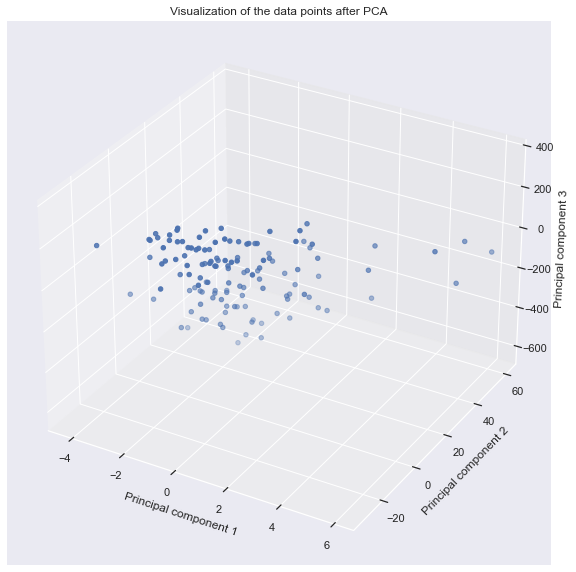

In [34]:
import seaborn as sns

sns.set_theme()
df = pd.read_csv("foo.csv", header = None)
x = df.iloc[:,0:3].values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2])
ax.set_title("Visualization of the data points after PCA")
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_zlabel("Principal component 3")
plt.show()

### Ερώτηση 2

> *Ποια είναι η χρησιμότητα του αλγορίθμου PCA ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παρακάτω τμήματα κώδικα.*

Αυτό που παρατηρήσαμε και από τα αποτελέσματα στο πίνακα σύγκρισης των 4 μοντέλων είναι ότι η μείωση των διαστάσεων των χαρακτηριστικών μειώνει κατά πολύ την ταχύτητα εκπαίδευσης του μοντέλου. Για παράδειγμα, από την περίπτωση των 13 χαρακτηριστικών που είχαμε χρόνο εκπαίδευσης $0.06$, μόλις μειώσαμε τα χαρακτηριστικά στις 3 διαστάσεις ο χρόνος εκτέλεσης μειώθηκε στα $0.009$ δευτερόλεπτα. Φυσικά, για το συγκεκριμένο σύνολο δεδομένων αυτοί οι χρόνοι δεν διαφέρουν σημαντικά αλλά για ένα μεγαλύτερο σύνολο δεδομένων η διαφορά στον χρόνο εκπαίδευσης θα είναι αισθητή, αυτό φαίνεται απ' το γεγονός ότι μετά τη μείωση των διαστάσεων ο χρόνος εκπαίδευσης μειώθηκε της τάξης του $1/10$.